In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.listdir(("/content/drive/My Drive/master_dataset")))

['train', 'test', 'Gmodel.h5', 'image.webp', 'hello.jpg', 'image16.jpeg', 'glaucoma.jpg']


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/master_dataset/train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary',
color_mode='grayscale')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/master_dataset/test',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary',
color_mode='grayscale')

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [ ]:
len(training_set)
len(test_set)

15

In [ ]:
batch_size = 32
model_info = classifier.fit(training_set,
                      steps_per_epoch = len(training_set),
                      epochs = 30,
                      validation_data = test_set,
                      validation_steps = len(test_set))


Epoch 1/30
15/15 [==============================] - 288s 18s/step - loss: 1.6227 - accuracy: 0.5253 - val_loss: 0.6737 - val_accuracy: 0.5781
Epoch 2/30
15/15 [==============================] - 32s 2s/step - loss: 0.6008 - accuracy: 0.6879 - val_loss: 0.6430 - val_accuracy: 0.6406
Epoch 3/30
15/15 [==============================] - 32s 2s/step - loss: 0.4984 - accuracy: 0.7736 - val_loss: 0.5434 - val_accuracy: 0.6406
Epoch 4/30
15/15 [==============================] - 33s 2s/step - loss: 0.5114 - accuracy: 0.7582 - val_loss: 0.5916 - val_accuracy: 0.6562
Epoch 5/30
15/15 [==============================] - 32s 2s/step - loss: 0.4803 - accuracy: 0.7538 - val_loss: 0.5808 - val_accuracy: 0.6719
Epoch 6/30
15/15 [==============================] - 31s 2s/step - loss: 0.4883 - accuracy: 0.7429 - val_loss: 0.5567 - val_accuracy: 0.6719
Epoch 7/30
15/15 [==============================] - 32s 2s/step - loss: 0.4891 - accuracy: 0.7736 - val_loss: 0.5002 - val_accuracy: 0.7656
Epoch 8/30
15/15 [

In [ ]:
#Performance evaluation
batch_size = 32
score = classifier.evaluate_generator(test_set,40/batch_size)
print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])

<ipython-input-9-8793e027dbe4>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = classifier.evaluate_generator(test_set,40/batch_size)


 Total:  64
Loss:  0.22426831722259521 Accuracy:  0.921875


In [ ]:
classifier.save('/content/drive/My Drive/master_dataset/Gmodel.h5')

In [13]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
target_size = (256,256)
model=load_model('/content/drive/My Drive/master_dataset/Gmodel.h5')
print("model loaded")

model loaded


In [11]:
# Function to load the image without additional preprocessing
def load_image(img_path, target_size):
    img = image.load_img(img_path, target_size=(256,256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array

In [20]:
# Path to the image you want to predict
img_path = '/content/drive/My Drive/master_dataset/test/class0/Im187.jpg'

1/1 [==============================] - 0s 74ms/step


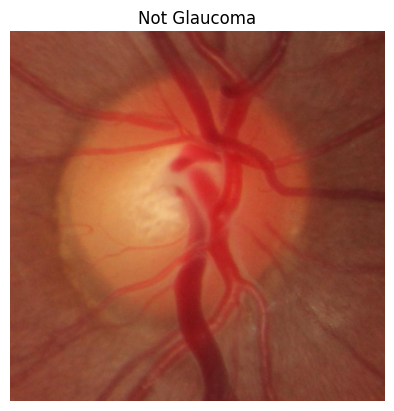

In [21]:
# Load the image
img, img_array = load_image(img_path, target_size)

# Predict the result
result = model.predict(img_array)
prediction = "Glaucoma" if result[0][0] == 1 else "Not Glaucoma"

# Display the image with the prediction result
plt.imshow(image.load_img(img_path))
plt.title(prediction)
plt.axis('off')
plt.show()

In [8]:
test_image = image.load_img('/content/drive/My Drive/preprocessed_images/image.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 129ms/step
Glaucoma


In [ ]:

test_image = image.load_img('/content/drive/My Drive/master_dataset/test/class0/Im181.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 39ms/step
Not Glaucoma


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline

def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Summarize history for accuracy
    axs[0].plot(range(1, len(model_history.history['accuracy']) + 1), model_history.history['accuracy'])
    axs[0].plot(range(1, len(model_history.history['val_accuracy']) + 1), model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy']) + 1))
    axs[0].legend(['train', 'val'], loc='best')

    # Summarize history for loss
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1))
    axs[1].legend(['train', 'val'], loc='best')

    plt.show()

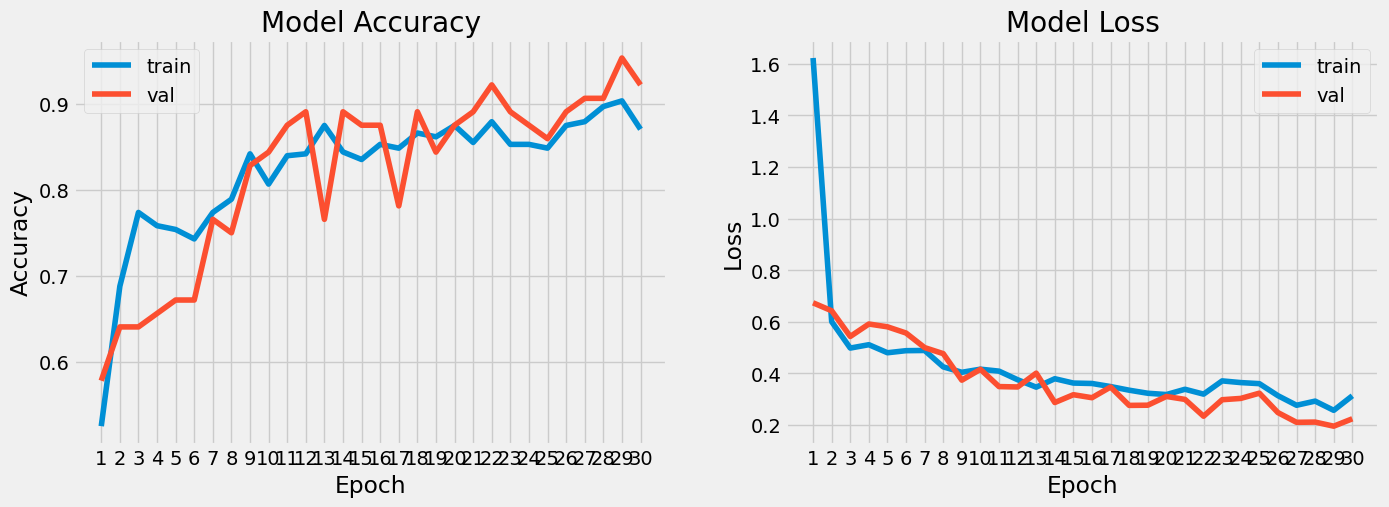

In [ ]:
plot_model_history(model_info)